**Load and Preprocess the Dataset**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('fer2013.csv')

# Extract the pixels and labels
pixels = data['pixels'].tolist()
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    faces.append(face)
faces = np.asarray(faces)

# Normalize the pixel values
faces = faces / 255.0

# Reshape the faces array to add a channel dimension
faces = np.expand_dims(faces, -1)

# Extract the labels and one-hot encode them
labels = pd.get_dummies(data['emotion']).values

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(faces, labels, test_size=0.2, random_state=42)

# Verify the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)
x_val shape: (7178, 48, 48, 1)
y_val shape: (7178, 7)


**Build the CNN Model**

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

c:\Users\25dea\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.2524 - loss: 1.8189 - val_accuracy: 0.3774 - val_loss: 1.6059
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.3758 - loss: 1.5899 - val_accuracy: 0.4537 - val_loss: 1.4330
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.4399 - loss: 1.4554 - val_accuracy: 0.4978 - val_loss: 1.3262
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.4758 - loss: 1.3640 - val_accuracy: 0.5134 - val_loss: 1.2809
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.4939 - loss: 1.3261 - val_accuracy: 0.5242 - val_loss: 1.2649
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.5105 - loss: 1.2916 - val_accuracy: 0.5488 - val_loss: 1.2145
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.5321 - loss: 1.2522 - val_accuracy: 0.5571 - val_loss: 1.1886
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.5343 - loss: 1.2345 - 

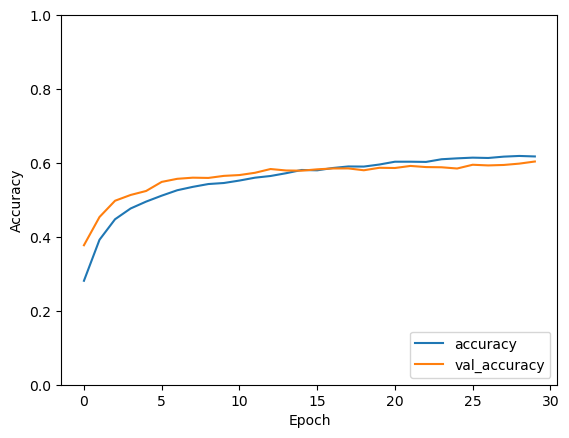

225/225 - 2s - 8ms/step - accuracy: 0.6039 - loss: 1.0794
Validation accuracy: 0.6039286851882935


In [23]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(f"Validation accuracy: {val_acc}")


**SAVE THE TRAINED MODEL**

In [24]:
model.save('emotion_detection_model.keras')

**Real-time Emotion Detection**

C:\Users\25dea\AppData\Local\Temp\ipykernel_8196\623809746.py:58: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=50)
c:\Users\25dea\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


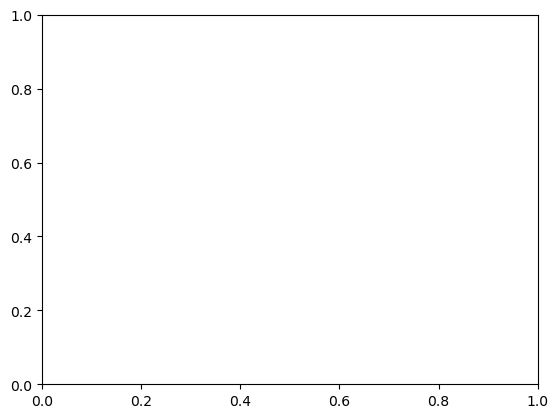

In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the pre-trained emotion detection model
model = load_model('emotion_detection_model.keras')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to preprocess the image
def preprocess_image(image, target_size):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

# Start video capture
video_capture = cv2.VideoCapture(0)

if not video_capture.isOpened():
    print("Error: Could not open video device.")
    video_capture.release()
    raise Exception("VideoCapture not opened.")

fig, ax = plt.subplots()

def update(frame):
    ret, frame = video_capture.read()
    if not ret:
        print("Error: Frame capture failed.")
        return
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        roi_gray = preprocess_image(roi_gray, (48, 48))
        
        predictions = model.predict(roi_gray)
        max_index = np.argmax(predictions[0])
        emotion = emotion_labels[max_index]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2, cv2.LINE_AA)
    
    ax.clear()
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.axis('off')

ani = FuncAnimation(fig, update, interval=50)
plt.show()

# Release the capture when done
video_capture.release()